Notebook showing how the Tau-Hybrid algorithm works internally.  Plot show values of reaction indicator variables 'r1', 'r2', and 'r3', and their value over time.

Example simulation of a model with two species, A (set to be continuous) and B (set to be discrete). The value of
the reaction indicator variables: r1 (A + B → ∅), r2 (∅ → A), and r3 (∅ → B) are also shown. The population of A changes continuously because r2 is deterministic (thus the indicator variable is ignored). The population of B changes discretely when r1 or r3 fires, which happens when their value crosses the y = 0 axis and becomes positive. We then determine the number of times the reaction is red. The population of A also changes discretely when r1 fires.


In [2]:
import os
import sys
sys.path.insert(1, os.path.abspath(os.path.join(os.getcwd(), '../../GillesPy2/')))
import gillespy2
from matplotlib import pyplot as plt

In [3]:
def create_model():
    # Initialize Model
    model = gillespy2.Model(name="TauHybridExample")

    # Define Variables (GillesPy2.Species)
    A = gillespy2.Species(name='A', initial_value=0, mode="continuous")
    B = gillespy2.Species(name='B', initial_value=0, mode="discrete")

    # Add Variables to Modelre
    model.add_species([A, B])
    
    # Define Parameters
    k1 = gillespy2.Parameter(name='k1', expression=0.1)
    k2 = gillespy2.Parameter(name='k2', expression=1)
    k3 = gillespy2.Parameter(name='k3', expression=1)
    
    # Add Parameters to Model
    model.add_parameter([k1, k2, k3])

    # Define Reactions
    r1 = gillespy2.Reaction(name="r1", reactants={'A': 1, 'B': 1}, products={}, rate='k1')
    r2 = gillespy2.Reaction(name="r2", reactants={}, products={'A': 1}, rate='k2')
    r3 = gillespy2.Reaction(name="r3", reactants={}, products={'B': 1}, rate='k3')

    # Add Reactions to Model
    model.add_reaction([r1, r2, r3])
    
    # Define Timespan
    tspan = gillespy2.TimeSpan.linspace(t=10, num_points=101)
    
    # Set Model Timespan
    model.timespan(tspan)
    return model

In [4]:
model = create_model()

In [5]:
sol = gillespy2.TauHybridSolver(model=model, profile_reactions=True)
%time result = sol.run()

CPU times: user 102 ms, sys: 0 ns, total: 102 ms
Wall time: 106 ms


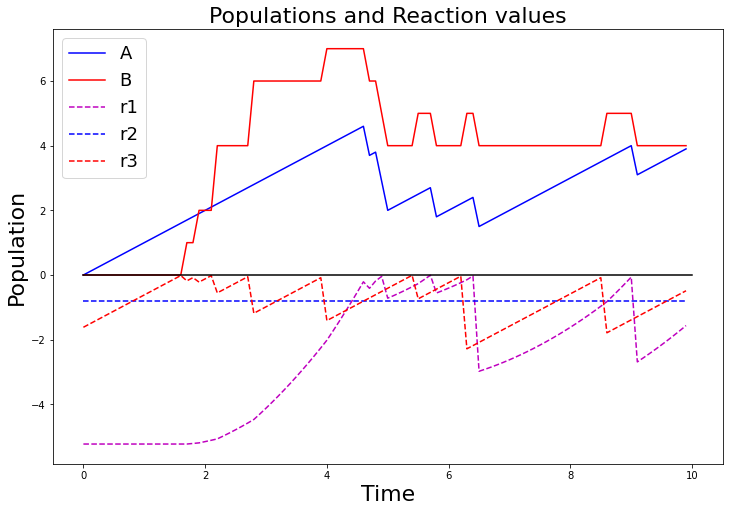

In [17]:
plt.figure(figsize=(12,8))
plt.plot(sol.profile_data['time'],sol.profile_data['A'], '-b', label='A')
plt.plot(sol.profile_data['time'],sol.profile_data['B'], '-r', label='B')
plt.plot(sol.profile_data['time'],sol.profile_data['r1'],'--m',label='r1')
plt.plot(sol.profile_data['time'],sol.profile_data['r2'], '--b',label='r2')
plt.plot(sol.profile_data['time'],sol.profile_data['r3'], '--r',label='r3')

plt.plot([0,10], [0,0], color='black')

plt.legend()
plt.title("Populations and Reaction values", fontsize=22)
plt.legend(fontsize=18,loc="best")
plt.ylabel('Population', fontsize=22)
plt.xlabel('Time', fontsize=22)
